In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Import Data

In [2]:
df= pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Preparation

In [5]:
retail_df= df.copy()
df.shape

(541909, 8)

In [6]:
retail_df.dropna(inplace=True)
# there are negative values on Quantity variable, this is caused by the refund invoices (Invoices containing the letter "C"), reassign df without refund invoices
retail_df = retail_df[~retail_df["InvoiceNo"].str.contains("C", na=False)]
retail_df.shape

(397924, 8)

In [7]:
# transform to datetime types
retail_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## EDA

<AxesSubplot:>

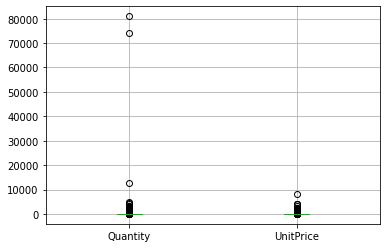

In [8]:
retail_df[['Quantity', 'UnitPrice']].boxplot()

In [9]:
# checking the different values for country except UK in the dataset
country= retail_df['Country'].value_counts().sort_values(ascending= False)[1:11]
country

Germany        9042
France         8342
EIRE           7238
Spain          2485
Netherlands    2363
Belgium        2031
Switzerland    1842
Portugal       1462
Australia      1185
Norway         1072
Name: Country, dtype: int64

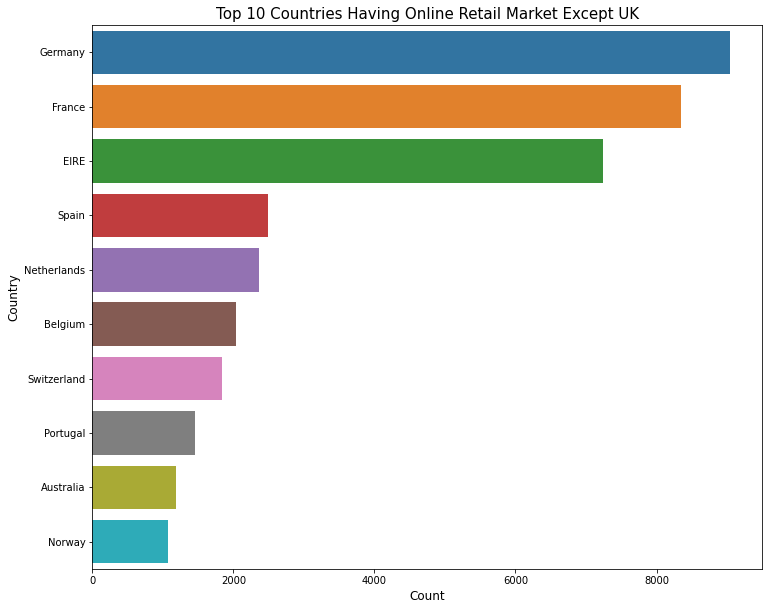

In [10]:
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x= country.values, y= country.index)
plt.title('Top 10 Countries Having Online Retail Market Except UK', fontsize= 15)
plt.xlabel('Count', fontsize= 12)
plt.ylabel('Country', fontsize= 12)
plt.show()


In [11]:
# checking at each country's sales except UK
retail_df['Sales']= retail_df['UnitPrice'] * retail_df['Quantity']
sales= retail_df.groupby('Country')['Sales'].agg('sum').sort_values(ascending= False)[1:11]
sales


Country
Netherlands    285446.34
EIRE           265545.90
Germany        228867.14
France         209024.05
Australia      138521.31
Spain           61577.11
Switzerland     56443.95
Belgium         41196.34
Sweden          38378.33
Japan           37416.37
Name: Sales, dtype: float64

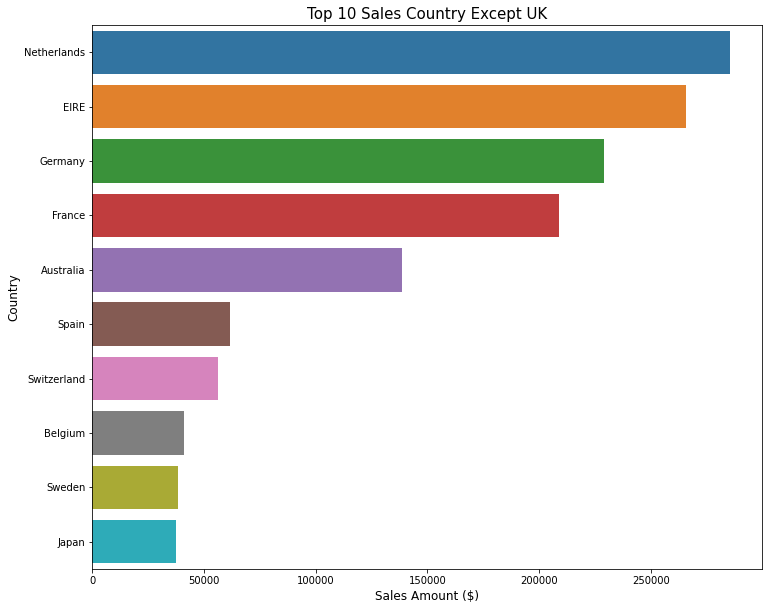

In [12]:
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x= sales.values, y= sales.index)
plt.title('Top 10 Sales Country Except UK', fontsize= 15)
plt.xlabel('Sales Amount ($)', fontsize= 12)
plt.ylabel('Country', fontsize= 12)
plt.show()

In [13]:
# checking how many unique customer IDs and different number of unique countries are there

customerID = retail_df['CustomerID'].nunique()
coutr = retail_df['Country'].nunique()

print("There are {} number of different customers".format(customerID))
print("There are {} number of different countries who do online retailing from UK".format(coutr))

There are 4339 number of different customers
There are 37 number of different countries who do online retailing from UK


## Cohort Analysis

In [14]:
# assign acquisition month cohort
def getmonth(x) : 
    return dt.datetime(x.year, x.month, 1)
    
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].apply(getmonth)
grouping= retail_df.groupby('CustomerID')['InvoiceMonth']
retail_df['CohortMonth']= grouping.transform('min')
retail_df.tail()   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01


In [15]:
# Extract integer values from data
def GetDataInt(df, column):
    year= df[column].dt.year
    month= df[column].dt.month
    day= df[column].dt.day
    return year, month, day

invoice_year, invoice_month, _= GetDataInt(retail_df, 'InvoiceMonth')
cohort_year, cohort_month, _= GetDataInt(retail_df, 'CohortMonth')
years_diff= invoice_year - cohort_year
month_diff= invoice_month - cohort_month
retail_df['CohortIndex']= years_diff * 12 + month_diff + 1
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [16]:
# Count monthly active customers from each cohort
group= retail_df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data= group['CustomerID'].apply(pd.Series.nunique)
cohort_data= cohort_data.reset_index()
cohort_counts= cohort_data.pivot(index='CohortMonth', columns= 'CohortIndex', values= 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Customer Retention 
cohort_sizes= cohort_counts.iloc[:,0]
retention= cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


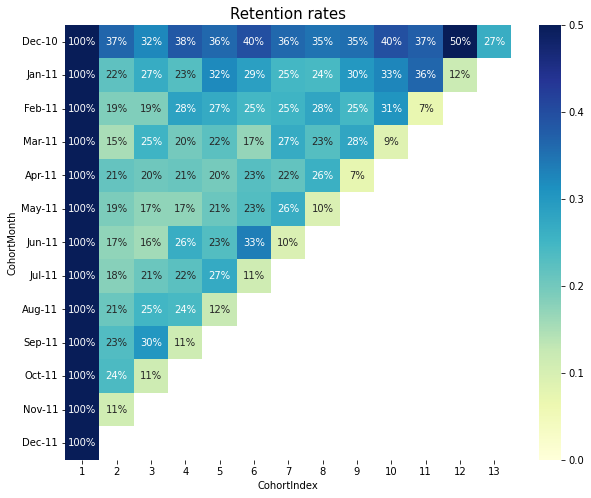

In [18]:
month_list = ["Dec-10", "Jan-11", "Feb-11", "Mar-11", "Apr-11",\
              "May-11", "Jun-11", "Jul-11", "Aug-11", "Sep-11", \
              "Oct-11", "Nov-11", "Dec-11"]

plt.figure(figsize=(10, 8))
plt.title('Retention rates', fontsize= 15)
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'YlGnBu',
            yticklabels=month_list)
plt.show()

## RFM (Recency, Frequency, Monetary) Segmentation

In [19]:
# calculate RFM Metrics
snapshot_date = max(retail_df['InvoiceDate']) + datetime.timedelta(days=1)
# Aggregate data on a customer level
datamart = retail_df.groupby(['CustomerID']).agg({
'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count',
'Sales': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
'InvoiceNo': 'Frequency',
'Sales': 'MonetaryValue'}, inplace=True)

datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [20]:
#Recency quartiles
r_labels= range(4,0,-1)
r_quartiles= pd.qcut(datamart['Recency'], 4, labels=r_labels)
datamart= datamart.assign(R= r_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,182,4310.00,4
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,310,17,334.40,1
...,...,...,...,...
18280.0,278,10,180.60,1
18281.0,181,7,80.82,1
18282.0,8,12,178.05,4


In [21]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)
datamart

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1


In [22]:
#Build RFM segment and RFM score
def join_rfm(x): return str(x['R'])+','+str(x['F'])+','+str(x['M'])

datamart['RFM_Segment']= datamart.apply(join_rfm, axis=1)
datamart['RFM_Score']= datamart[['R','F','M']].sum(axis=1)
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,"1.0,1.0,4.0",6
12347.0,2,182,4310.00,4,4,4,"4.0,4.0,4.0",12
12348.0,75,31,1797.24,2,2,4,"2.0,2.0,4.0",8
12349.0,19,73,1757.55,3,3,4,"3.0,3.0,4.0",10
12350.0,310,17,334.40,1,1,2,"1.0,1.0,2.0",4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,"1.0,1.0,1.0",3
18281.0,181,7,80.82,1,1,1,"1.0,1.0,1.0",3
18282.0,8,12,178.05,4,1,1,"4.0,1.0,1.0",6


In [23]:
#Summary metrics per RFM score
datamart.groupby('RFM_Score').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           260.8       8.2         158.9   384
4           175.7      13.6         239.6   383
5           154.3      21.4         368.5   516
6            96.3      27.9         824.0   461
7            79.1      38.5         755.5   459
8            64.6      56.8         994.1   454
9            46.0      80.0        1801.4   417
10           32.1     112.3        2049.4   426
11           21.1     187.7        4083.2   392
12            7.3     374.5        9319.2   447

In [24]:
# the following dict has been made according to the famous RFM graphic
seg_map = {
    r'[1-2][1-2]': 'Hibernating',      # Customer's shopped long ago but with less frequency and monetary value
    r'[1-2][3]': 'At_Risk',          # Customer's shopping less often now who used to shop a lot
    r'[1-2]4': 'Cant_Lose',            # Customer's shopped long ago who used to shop a lot.
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',           # High monetary value but good recency and frequency values
    r'[2-3][3-4]': 'Loyal_Customers',  # High frequency as well as monetary value with good recency
    r'31': 'Promising',
    r'41': 'New_Customers',            # Customer's who recently started shopping a lot but with less monetary value
    r'[3-4][2]': 'Potential_Loyalists', # High recency and monetary value, average frequency
    r'4[3-4]': 'Best Customers'        # Highest frequency as well as monetary value with least recenc
}

In [25]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,"1.0,1.0,4.0",6
12347.0,2,182,4310.00,4,4,4,"4.0,4.0,4.0",12
12348.0,75,31,1797.24,2,2,4,"2.0,2.0,4.0",8
12349.0,19,73,1757.55,3,3,4,"3.0,3.0,4.0",10
12350.0,310,17,334.40,1,1,2,"1.0,1.0,2.0",4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,"1.0,1.0,1.0",3
18281.0,181,7,80.82,1,1,1,"1.0,1.0,1.0",3
18282.0,8,12,178.05,4,1,1,"4.0,1.0,1.0",6


In [26]:
#we will be using Recency and Frequency scores for customer segmentation. 
#We are assuming that a customer who has recently purchased and who is often purchasing should have high RFM scores.
datamart['Segment'] = datamart['R'].astype(str) + datamart['F'].astype(str)
datamart['Segment'] = datamart['Segment'].replace(seg_map, regex=True)
datamart=datamart.reset_index()
datamart.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,4,"1.0,1.0,4.0",6,Hibernating
1,12347.0,2,182,4310.00,4,4,4,"4.0,4.0,4.0",12,Best Customers
2,12348.0,75,31,1797.24,2,2,4,"2.0,2.0,4.0",8,Hibernating
3,12349.0,19,73,1757.55,3,3,4,"3.0,3.0,4.0",10,Need_Attention
4,12350.0,310,17,334.40,1,1,2,"1.0,1.0,2.0",4,Hibernating


In [27]:
rfm_segment= datamart.groupby('Segment')['CustomerID'].count()
rfm_segment

Segment
About_to_Sleep          419
At_Risk                 466
Best Customers          849
Cant_Lose               200
Hibernating            1484
Loyal_Customers         326
Need_Attention          318
New_Customers           111
Potential_Loyalists     166
Name: CustomerID, dtype: int64

In [30]:
datamart.to_csv('retail_online_cohortRFM_segmentation.csv', index= False)